# Project on Salary Estimation
The primary goal of the project is to develop a predictive model that estimates salaries based on the position levels of employees. This predictive model will help in understanding the relationship between position levels and salaries and enable organizations to make informed decisions regarding salary structures.








In [98]:
# Importing the libraries
import pandas as pd
import numpy as np

In [99]:
#Mounting the colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Loading**

The dataset named Position_Salaries.csv is loaded into a Pandas DataFrame.
This dataset typically comprises two columns: "Position Level" and "Salary".

We use Pandas' read_csv() function for loading the CSV file, making it easy to explore and manipulate the data.

In [100]:
# Specify the path to your CSV file within your Google Drive

file_path ='/content/drive/MyDrive/Google_collab/1.Machine_Learning/2.Individual_Projects/1.project1_SVM/Position_Salaries.csv'



In [101]:
# Load the dataset using pandas
dataset = pd.read_csv(file_path)

In [102]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


**Data Preparation:**

Independent (X) and dependent (y) variables are isolated from the dataset.
The independent variable (X) contains the position levels, while the dependent variable (y) holds corresponding salaries.
It's important to reshape the position level data (X) into a 2D array to ensure compatibility with the SVR model.

In [103]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [104]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [105]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

**SVR Model Selection:**

SVR, a variant of Support Vector Machines (SVM) tailored for regression tasks, is chosen for modeling.

We instantiate the SVR model with the radial basis function (RBF) kernel, a widely used choice for handling nonlinear relationships.

In [106]:
from sklearn.svm import SVR

In [107]:
regressor = SVR(kernel = 'rbf')

In [108]:
regressor.fit(X,y)

SVR()

In [109]:
y_pred = regressor.predict(X)

In [110]:
y_pred

array([129997.08281   , 129996.48449165, 129996.54009563, 129997.43313201,
       129999.048301  , 130000.951699  , 130002.56686799, 130003.45990437,
       130003.51550835, 130002.91719   ])

In [111]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

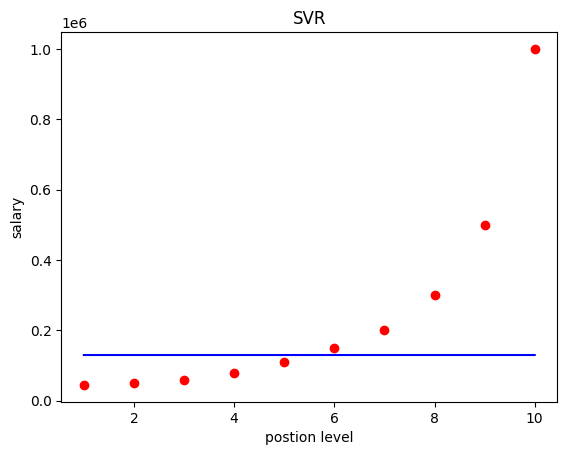

In [112]:
import matplotlib.pyplot as plt
plt.scatter(X,y,color='red')
plt.plot(X ,regressor.predict(X),color = 'blue')
plt.title('SVR')
plt.xlabel("postion level")
plt.ylabel("salary")
plt.show()

**Feature Scaling:**

Both the independent variable (X) and the dependent variable (y) undergo Min-Max scaling.
Min-Max scaling transforms the features to a range between 0 and 1, enhancing the convergence rate and model performance.
For scaling, we employ scikit-learn's MinMaxScaler.

In [113]:
from sklearn.preprocessing import MinMaxScaler  #  [ 0 - 1]

In [114]:
Sc_X =MinMaxScaler()

In [115]:
Sc_y = MinMaxScaler()

In [116]:
X = Sc_X.fit_transform(X)

**Model Training and Prediction:**

The SVR model is trained using the scaled feature set (X) and target variable (y).
Predictions are made using the trained SVR model to estimate salaries based on position levels.


While SVR offers several advantages for the salary estimation problem, it's important to consider that the choice of algorithm depends on factors such as the data's characteristics, problem complexity, computational requirements, and the trade-off between accuracy and interpretability. Other regression techniques such as linear regression, decision trees, and ensemble methods could also be considered based on the specific requirements of the dataset and problem domain

In [117]:
X.shape

(10, 1)

In [118]:
y.shape

(10,)

In [119]:
y=y.reshape(-1, 1)

In [120]:
y.shape

(10, 1)

In [121]:
y = Sc_y.fit_transform(y)

In [122]:
X

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

In [123]:
y

array([[0.        ],
       [0.0052356 ],
       [0.01570681],
       [0.03664921],
       [0.06806283],
       [0.10994764],
       [0.16230366],
       [0.26701571],
       [0.47643979],
       [1.        ]])

In [124]:
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [125]:
y_pred = regressor.predict(X)

In [126]:
y_pred

array([0.10034464, 0.08740955, 0.10528368, 0.13617037, 0.16355036,
       0.18674459, 0.23783602, 0.36736035, 0.57622936, 0.77126283])

In [127]:
y_pred = y_pred.reshape(-1,1)

**Inverse Transformation:**

After obtaining predictions, we inverse-transform the scaled salary values back to their original scale using the inverse_transform() method.
This step ensures that the predicted salary values remain interpretable and aligned with the original dataset.

In [128]:
y_pred = Sc_y.inverse_transform(y_pred)

In [129]:
y_pred

array([[140829.13452497],
       [128476.12185967],
       [145545.91621277],
       [175042.70032101],
       [201190.59221806],
       [223341.08123049],
       [272133.39541853],
       [395829.1305024 ],
       [595299.04272877],
       [781556.00234437]])

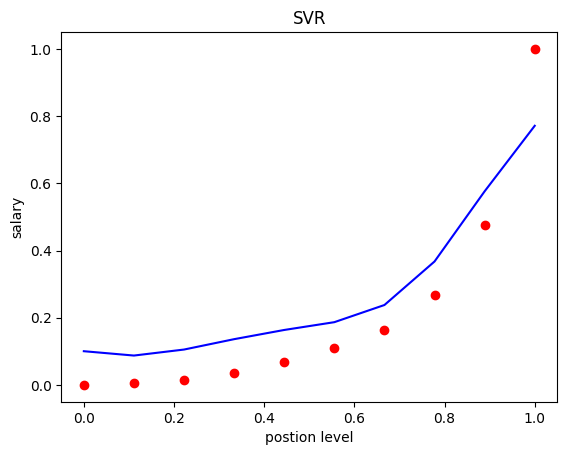

In [130]:
import matplotlib.pyplot as plt
plt.scatter(X,y,color='red')
plt.plot(X ,regressor.predict(X),color = 'blue')
plt.title('SVR')
plt.xlabel("postion level")
plt.ylabel("salary")
plt.show()

We utilize Matplotlib to create visualizations that illustrate the relationship between position levels and salaries.
Original data points are plotted as a scatter plot, while the SVR-generated regression line is superimposed to demonstrate the model's fitting performance.

**Summary:**

The project showcases the application of SVR for predicting salaries based on position levels. It encompasses stages such as data loading, preprocessing, modeling, and visualization to develop a predictive model and gain insights into salary structures based on position levels.